In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch

In [9]:
# (do not change this code)
words = open('names.txt').read().splitlines()

In [13]:
# (do not change this code)
chars = sorted(list(set([c for w in words for c in w])))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

In [4]:
# (do not change this code)
itos = {i:s for s,i in stoi.items()}

In [ ]:
# Exercise 1: build a simple bigram model for next-character prediction
# - store the co-counts of each character in a 27x27 matrix N
# - compute the normalized probabilities into a matrix P
# - generate a bunch of samples from the model using P and torch.multinomial

In [ ]:
N = torch.zeros(27,27)
for w in words:
    w = '.' + w + '.'
    k = len(w)
    for i in range(k-1):
        j = i+1
        c1 = w[i]
        c2 = w[j]
        i1 = stoi[c1]
        i2 = stoi[c2]
        N[i1][i2]+=1 #count the nbr of apparition of the letter in position (i1,i2)

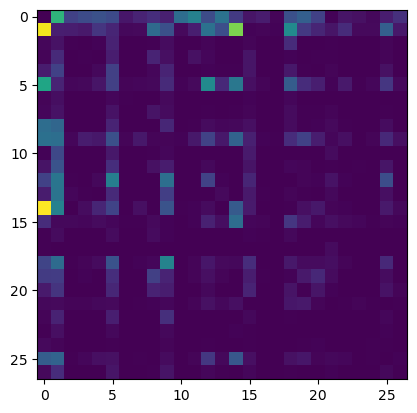

In [17]:
# display the matrix
plt.imshow(N)
plt.show()

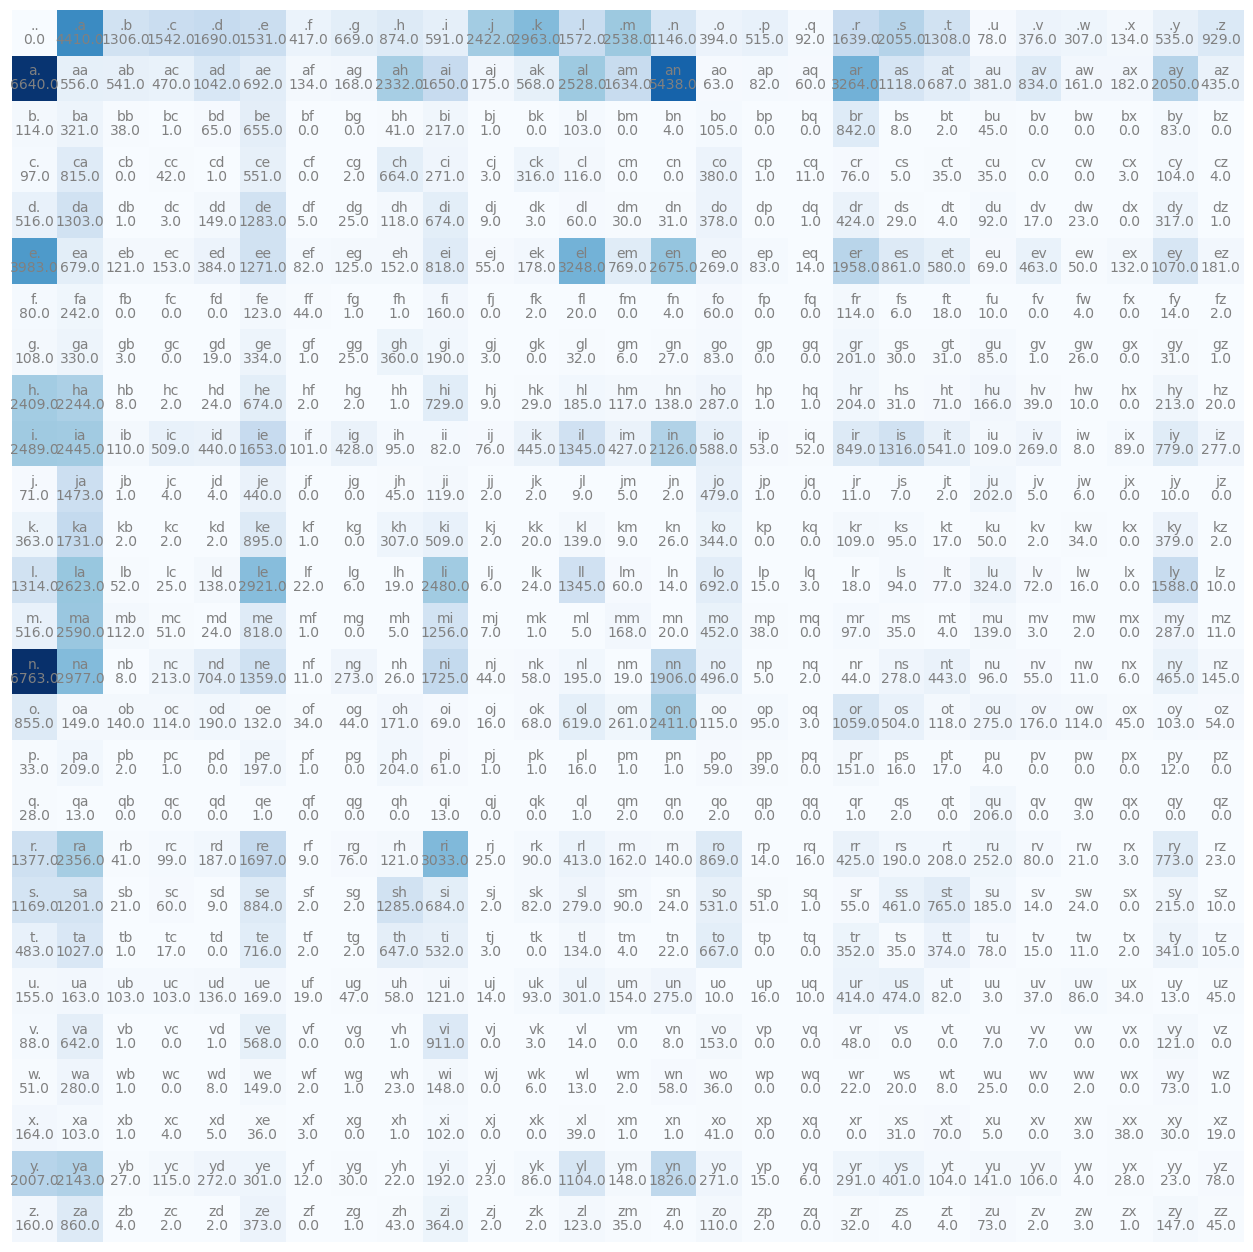

In [18]:
#display the matrix in human-readable format
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off')
plt.show()

In [19]:
# useful to reproduce results
g = torch.Generator().manual_seed(2147483647)

In [ ]:
P = N/N.sum(axis=1, keepdim=True) #matrix normalized 

In [ ]:
# sample 30 words from the model (hint: use torch.multinomial)
for _ in range(30):
    ix = 0
    out = []
    while True:
        p = P[ix]
        ix = torch.multinomial(p, 1, replacement= True, generator=g).item()
        out.append(itos[ix])
        if ix==0: #no character anymore
            break
    print("".join(out))

adi.
zay.
heton.
n.
ssenyncaeredde.
kelay.
nazainjoede.
aholan.
l.
belay.
o.
kisyusepinaca.
mee.
ribllba.
selino.
m.
malda.
beleylarolon.
cahelanan.
kayalyali.
mian.
aracelah.
kelirisumacorikya.
grien.
nteleron.
souaroraslazyee.
ja.
ja.
joriusan.
caren.


In [ ]:
# Exercise 2: build the same bigram model using the NLL loss
# - the dataset is created and encoded for you
# - create the weights matrix W
# - build a training loop to minimize the NLL
# - sample from the model

In [31]:
# create a training set for bigram model
# (do not change this code) 
xs = []
ys = []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()

In [108]:
import torch.nn.functional as F

In [190]:
g = torch.Generator().manual_seed(2147483647)
W = torch.ones(27,27)
W.requires_grad= True

In [107]:
F.one_hot(xs)

tensor([[1, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 1, 0],
        [0, 0, 0,  ..., 0, 0, 1],
        [0, 0, 0,  ..., 1, 0, 0]])

In [113]:
lr=10
# training loop
for k in range(400):
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float()   # (N, 27)
    logits = xenc @ W                             # (N, 27)
    counts = logits.exp()
    probs = counts / counts.sum(dim=1, keepdim=True)
    loss = -torch.log(probs[torch.arange(len(xs)), ys]).mean()

    # backward pass
    loss.backward()

    # update (the gradients)
    W.data += - lr* W.grad 
    W.grad=None #reinitialise grad

    print(loss.item())

2.4835562705993652
2.4834494590759277
2.4833433628082275
2.4832382202148438
2.483133554458618
2.48302960395813
2.4829261302948
2.482823610305786
2.482722043991089
2.4826204776763916
2.4825198650360107
2.4824202060699463
2.48232102394104
2.48222279548645
2.4821243286132812
2.482027053833008
2.481930732727051
2.481834650039673
2.4817392826080322
2.4816441535949707
2.4815499782562256
2.4814565181732178
2.481363534927368
2.4812710285186768
2.4811792373657227
2.481088161468506
2.480997323989868
2.4809072017669678
2.480818033218384
2.4807288646698
2.480640411376953
2.4805524349212646
2.4804651737213135
2.4803781509399414
2.4802918434143066
2.480206251144409
2.480120897293091
2.4800362586975098
2.479952335357666
2.4798684120178223
2.479785442352295
2.4797027111053467
2.4796204566955566
2.479538917541504
2.4794576168060303
2.479376792907715
2.4792964458465576
2.4792168140411377
2.4791371822357178
2.4790587425231934
2.478980302810669
2.4789021015167236
2.4788248538970947
2.478747606277466
2.478

In [115]:
# finally, sample from the neural net model
g = torch.Generator().manual_seed(2147483647)

for k in range(10):
    out = []
    ix = 0
    for _ in range(10):
        x = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = x @W
        counts = logits.exp()
        probs = counts/counts.sum(dim=1, keepdim=True)
        ix =  torch.multinomial(probs, num_samples=1, generator=g).item()
        if ix == 0:
            break
        out.append(itos[ix])
    print(''.join(out))

cexze
momasurail
azityha
konimittai
n
llayn
ka
da
staiyaubrt
bhrigotai


In [ ]:
# Exercise 3: homework (*) extend the previous model to trigram

In [ ]:
# Exercise 4: let's build a better model
# Bengio et al. 2003 MLP language model paper, https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf

In [116]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
# build the dataset (do not change this code)
block_size = 3
def build_dataset(words):
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

X_train, Y_train = build_dataset(words[:n1])
X_dev, Y_dev = build_dataset(words[n1:n2])
X_test, Y_test = build_dataset(words[n2:])

In [183]:
emb_size = 300
hidden_size=128
nb_character=27

g = torch.Generator().manual_seed(2147483647)
C  = torch.randn((nb_character, emb_size), generator=g)
W1 = torch.randn((emb_size*block_size, hidden_size), generator=g)
b1 = torch.randn(hidden_size, generator=g)
W2 = torch.randn((hidden_size, nb_character), generator=g)
b2 = torch.randn(nb_character, generator=g)

parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True

In [184]:
# init weights (use torch.nn.init)
b1 = torch.nn.init.zeros_(b1)
b2 = torch.nn.init.zeros_(b2)
W1 = torch.nn.init.zeros_(W1)
W2 = torch.nn.init.zeros_(W2)

In [185]:
stepi = []
lossi = []

In [186]:
for p in parameters:
    p.requires_grad = True

In [197]:
# training loop (use the cross-entropy loss)
batch_size = 3000
lr=0.1
for i in range(2000):
    
    # minibatch
    ix = torch.randint(0, X_train.shape[0], (batch_size,)) 

    # forward pass
    emb = C[X_train[ix]] #embedding of batch 
    h = torch.tanh( emb.view(len(emb), -1) @ W1 + b1)  # hint: to flatten a tensor x, use x.view (-1, ...) 
    logits = h @ W2 + b2                     
    loss = F.cross_entropy(logits, Y_train[ix])
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update
    for p in parameters:
        p.data+= -lr* p.grad
    stepi.append(i)
    lossi.append(loss.log10().item())
    print(i, loss)

0 tensor(3.2958, grad_fn=<NllLossBackward0>)
1 tensor(3.2918, grad_fn=<NllLossBackward0>)
2 tensor(3.2877, grad_fn=<NllLossBackward0>)
3 tensor(3.2838, grad_fn=<NllLossBackward0>)
4 tensor(3.2798, grad_fn=<NllLossBackward0>)
5 tensor(3.2760, grad_fn=<NllLossBackward0>)
6 tensor(3.2719, grad_fn=<NllLossBackward0>)
7 tensor(3.2683, grad_fn=<NllLossBackward0>)
8 tensor(3.2647, grad_fn=<NllLossBackward0>)
9 tensor(3.2606, grad_fn=<NllLossBackward0>)
10 tensor(3.2561, grad_fn=<NllLossBackward0>)
11 tensor(3.2528, grad_fn=<NllLossBackward0>)
12 tensor(3.2478, grad_fn=<NllLossBackward0>)
13 tensor(3.2452, grad_fn=<NllLossBackward0>)
14 tensor(3.2401, grad_fn=<NllLossBackward0>)
15 tensor(3.2377, grad_fn=<NllLossBackward0>)
16 tensor(3.2332, grad_fn=<NllLossBackward0>)
17 tensor(3.2317, grad_fn=<NllLossBackward0>)
18 tensor(3.2276, grad_fn=<NllLossBackward0>)
19 tensor(3.2229, grad_fn=<NllLossBackward0>)
20 tensor(3.2221, grad_fn=<NllLossBackward0>)
21 tensor(3.2157, grad_fn=<NllLossBackward0>

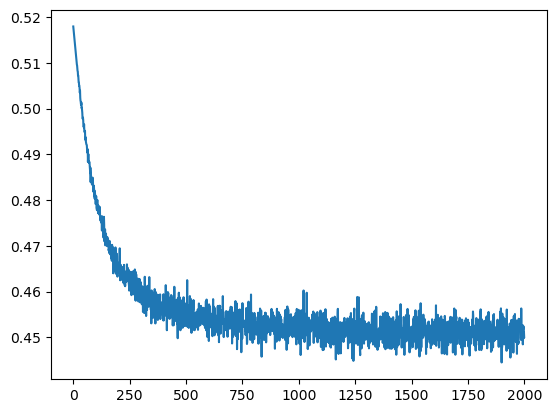

In [198]:
plt.plot(stepi, lossi)
plt.show()

In [200]:
# compute the train and val loss


In [ ]:
# compute the train and val loss.  here are the initial results I got.  
# Improve the loss by playing with the hyper-params and learning rate policy and report the results here.

In [ ]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 4)

for _ in range(20):
    
    out = []
    context = ???
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = ???
      logits = ???
      probs = ???
      ix = ???
      context = ???
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))